# Variational Circuit Map Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
def spectrum_pipeline(spam_model, kraus_model, data, num_iter_spam, num_iter_map, N=None):
    d = spam_model.d
    kraus_model.spam = spam_model
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam_model.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                        num_iter = 300,
                        verbose = False,
                       )
    
    spam_model.train(inputs = inputs_spam,
                     targets = targets_spam,
                     num_iter = num_iter_spam,
                     verbose = False,
                    )
    
    model = ModelQuantumMap(
                            channel = kraus_model,
                            loss_function = ProbabilityMSE(),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                )
    
    spectrum = channel_spectrum(kraus_model)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

### Three Layers

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_3.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum[:,0], spectrum[:,1], "o")
plt.show()

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_6.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

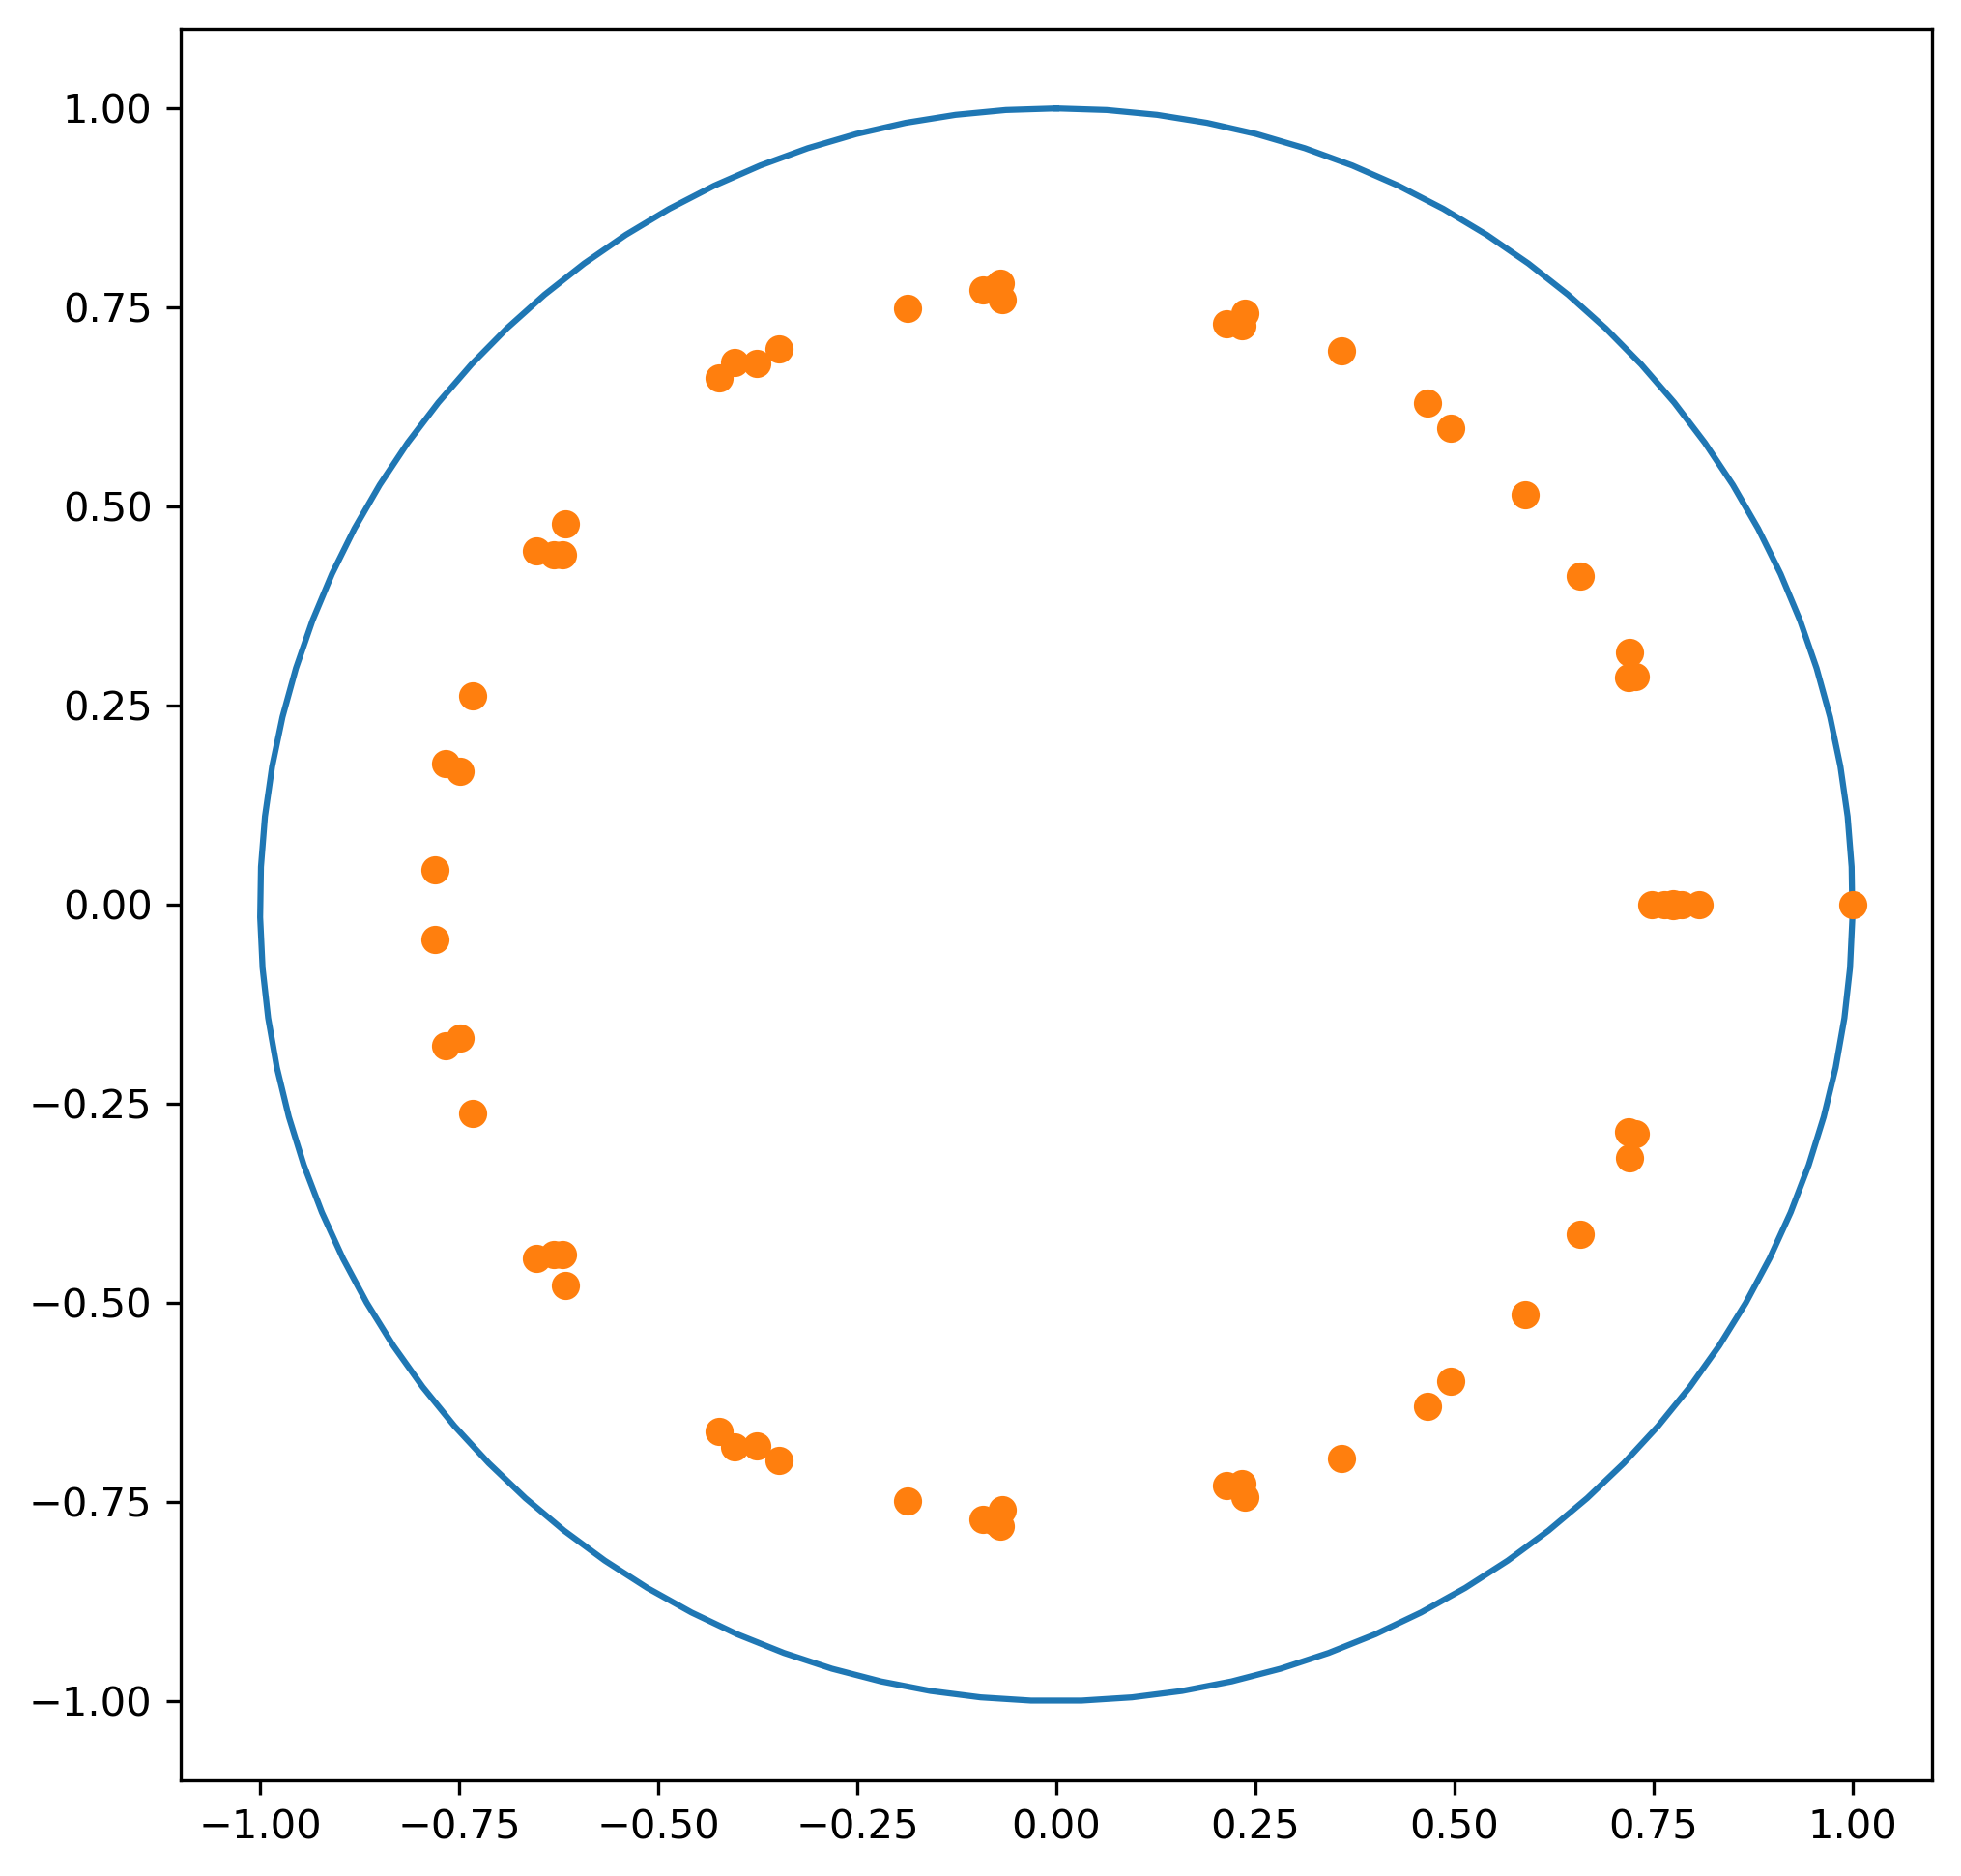

In [6]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum[:,0], spectrum[:,1], "o")
plt.show()

In [7]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004845335577782194


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0057436707791290184 0


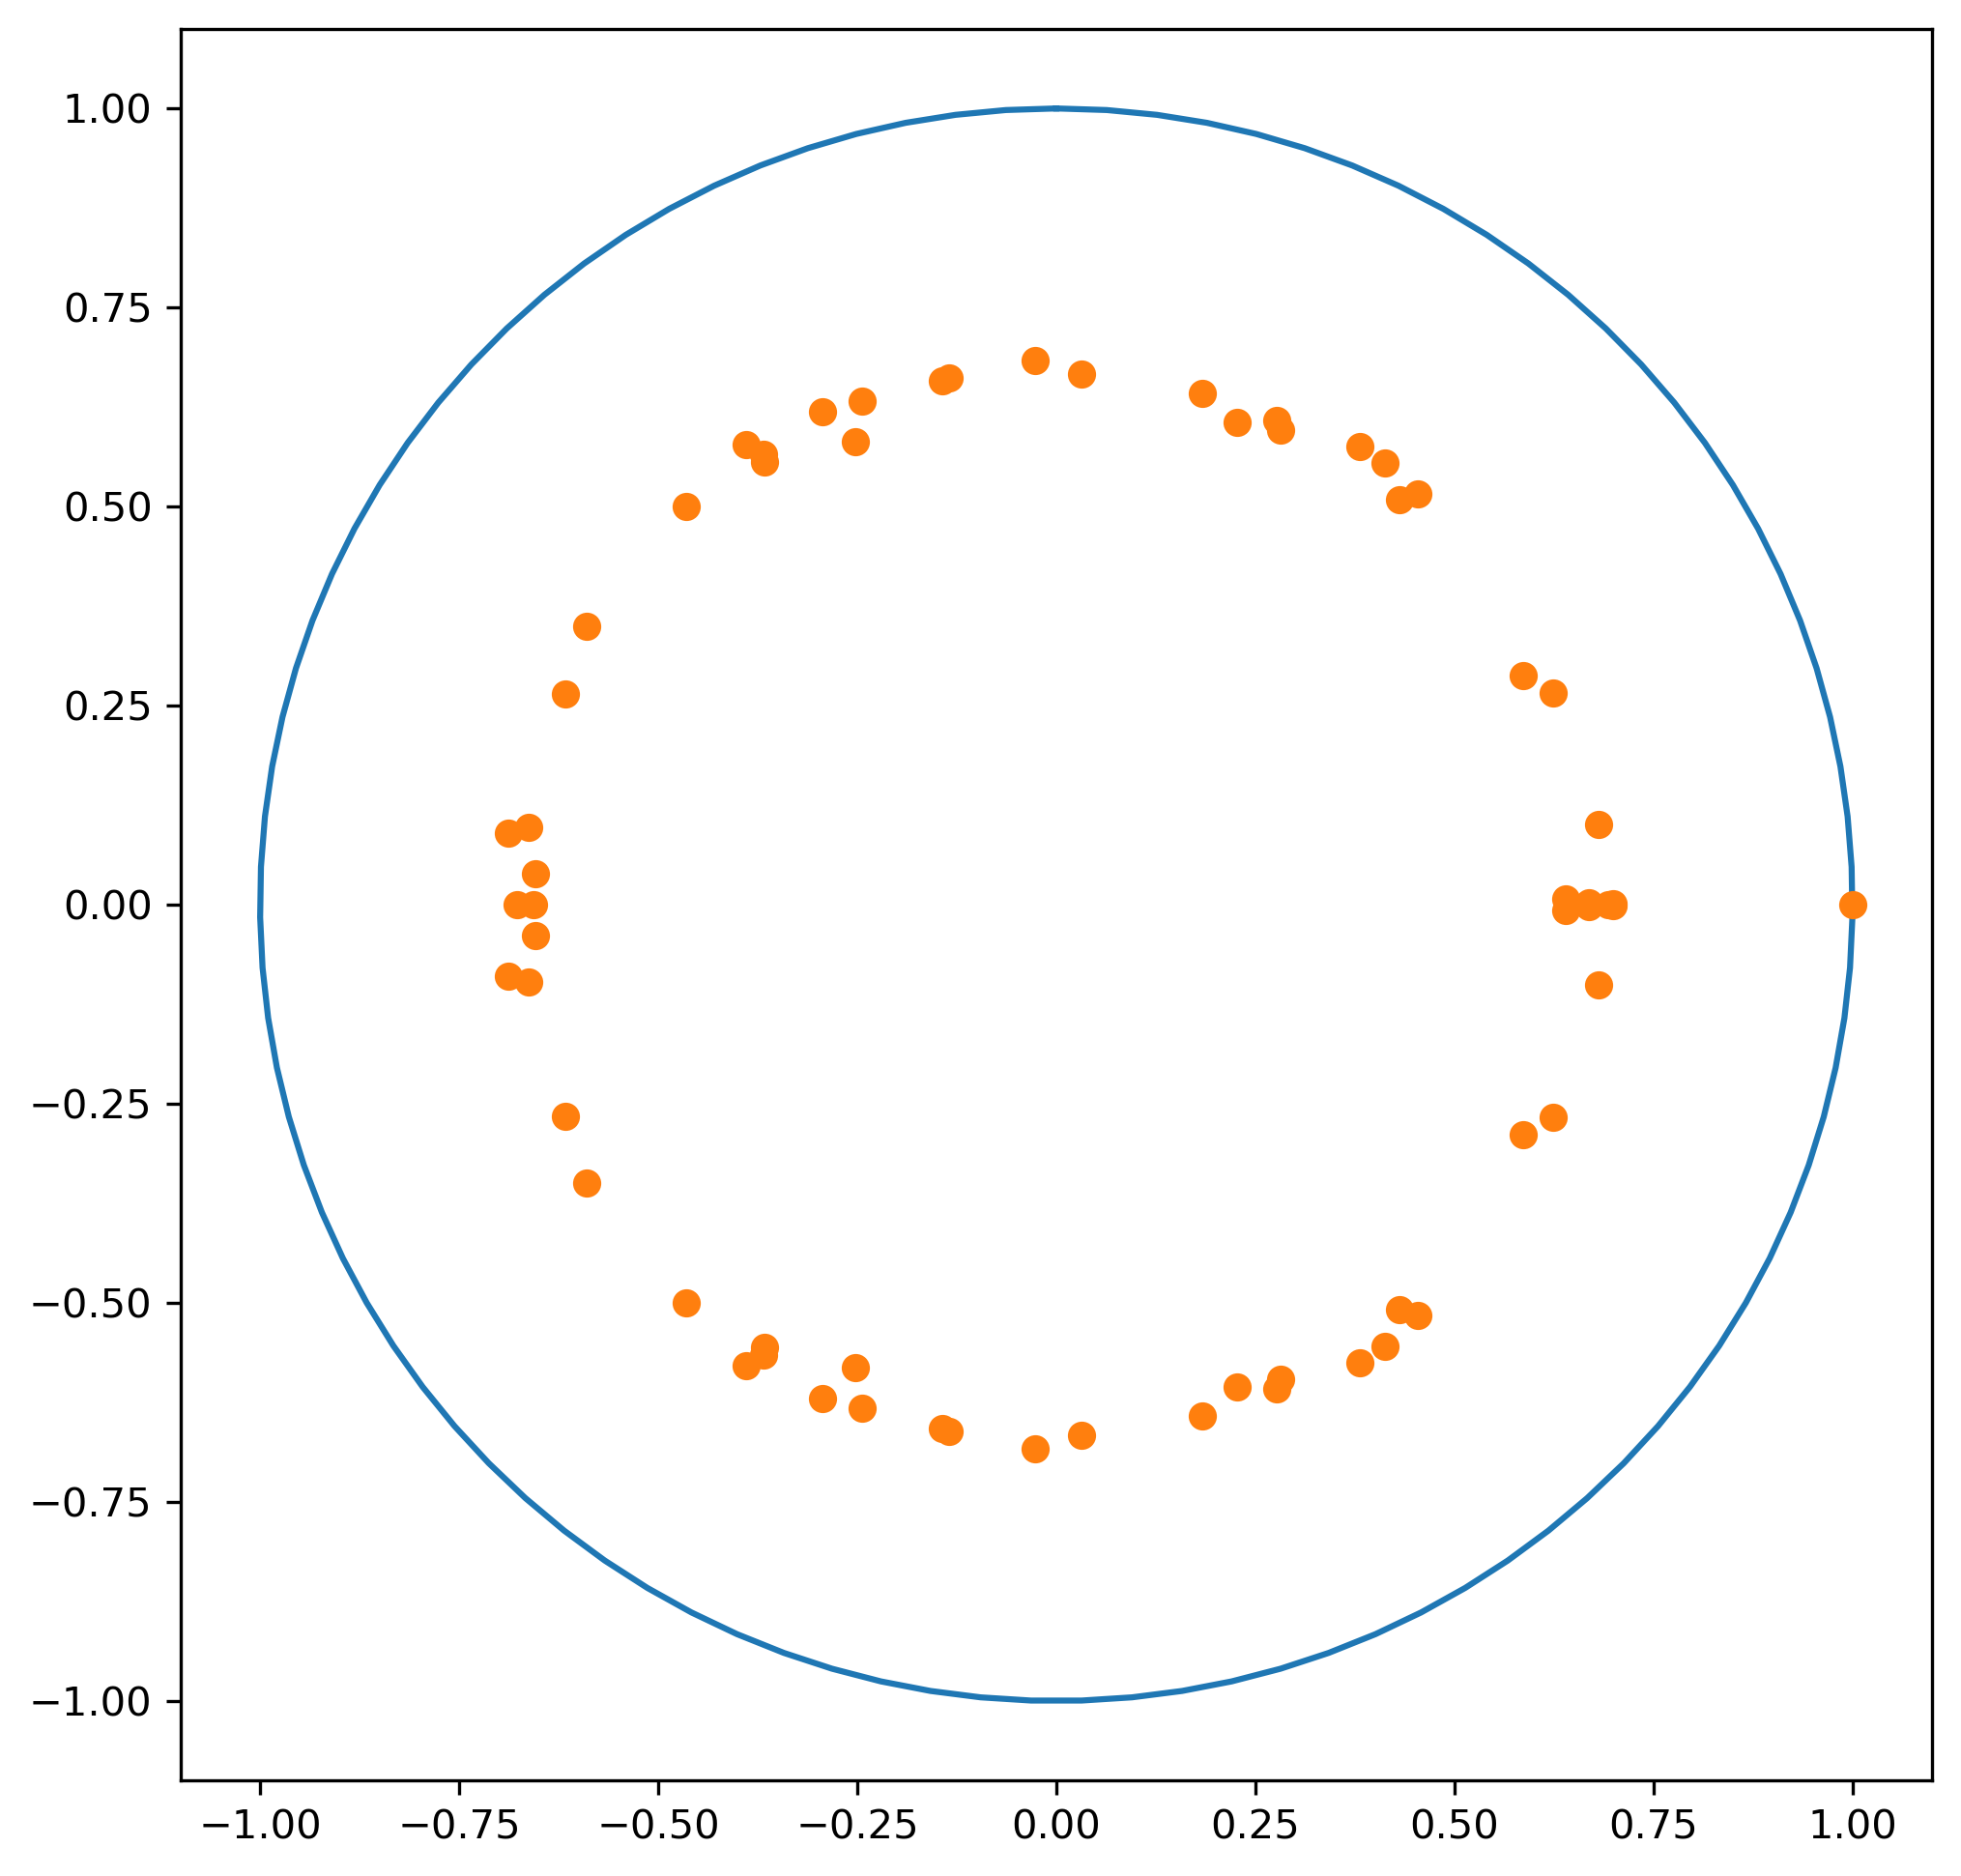

In [8]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum[:,0], spectrum[:,1], "o")
plt.show()

In [9]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_12.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004070212480028123


  0%|          | 0/1000 [00:00<?, ?it/s]

0.00555626309112215 0


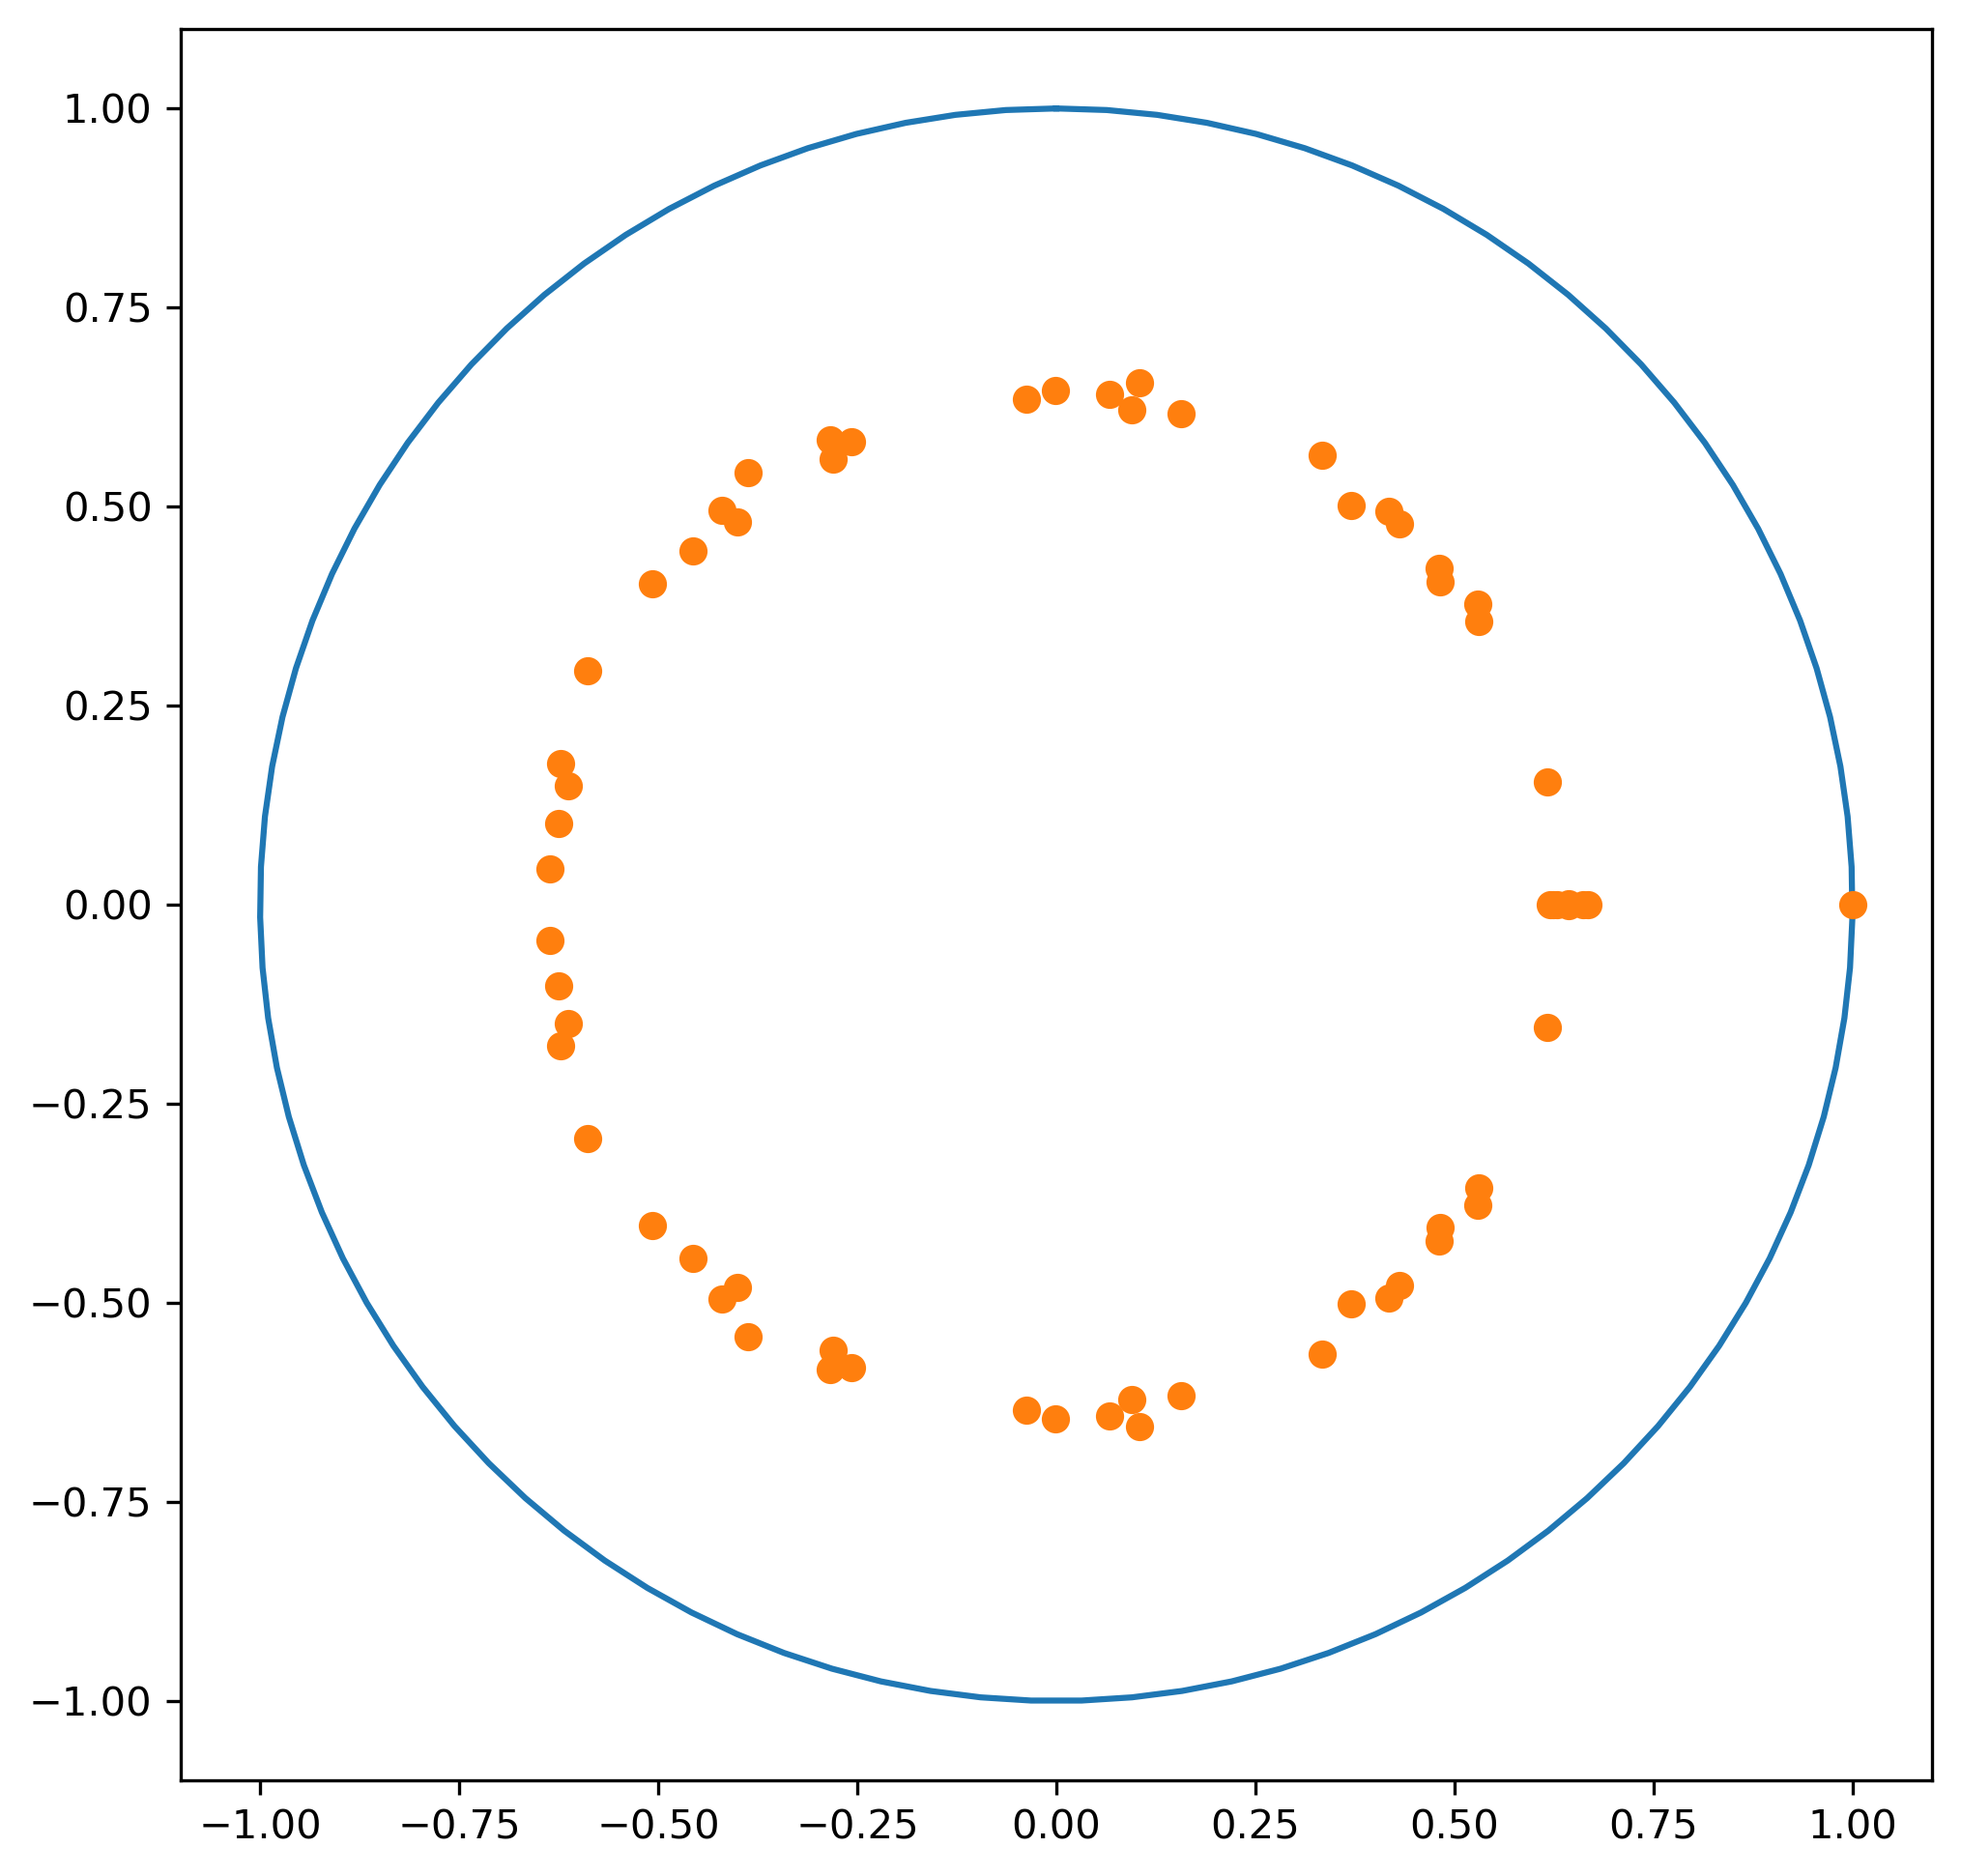

In [10]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum[:,0], spectrum[:,1], "o")
plt.show()

## 9 Layer vs. Toy Model

In [11]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum1, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                             use_corr_mat=True,
                                             optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                             kraus_model = KrausMap(d = d, 
                                                                    rank = d**2), 
                                             data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                             num_iter_spam = 1000, 
                                             num_iter_map = 1000,
                                             )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0004845335577782194


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0057436707791290184 0


In [12]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_2.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum2, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.000645367970355649


  0%|          | 0/1000 [00:00<?, ?it/s]

0.005076844891545614 0


In [13]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_3.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum3, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.000487667556246982


  0%|          | 0/1000 [00:00<?, ?it/s]

0.004894597376107686 0


In [14]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_4.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum4, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 1000, 
                                            num_iter_map = 1000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

0.00056851618175062


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0050255514110402084 0


In [15]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_map_list =  pickle.load(open("../../data/threeQubits_variational_9_7.p", "rb"))

targets_map = counts_to_probs(counts_map_list[:1000-6**n])
targets_spam = counts_to_probs(counts_map_list[1000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum5, circle, model = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.002851526383272499


  0%|          | 0/2000 [00:00<?, ?it/s]

0.006817686861997369 0


C:\Users\krist\AppData\Local\Temp\ipykernel_21228\281092659.py:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001D52B14EDD0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "First Realization", "Second Realization", "Third Realization", "Fourth Realization"])


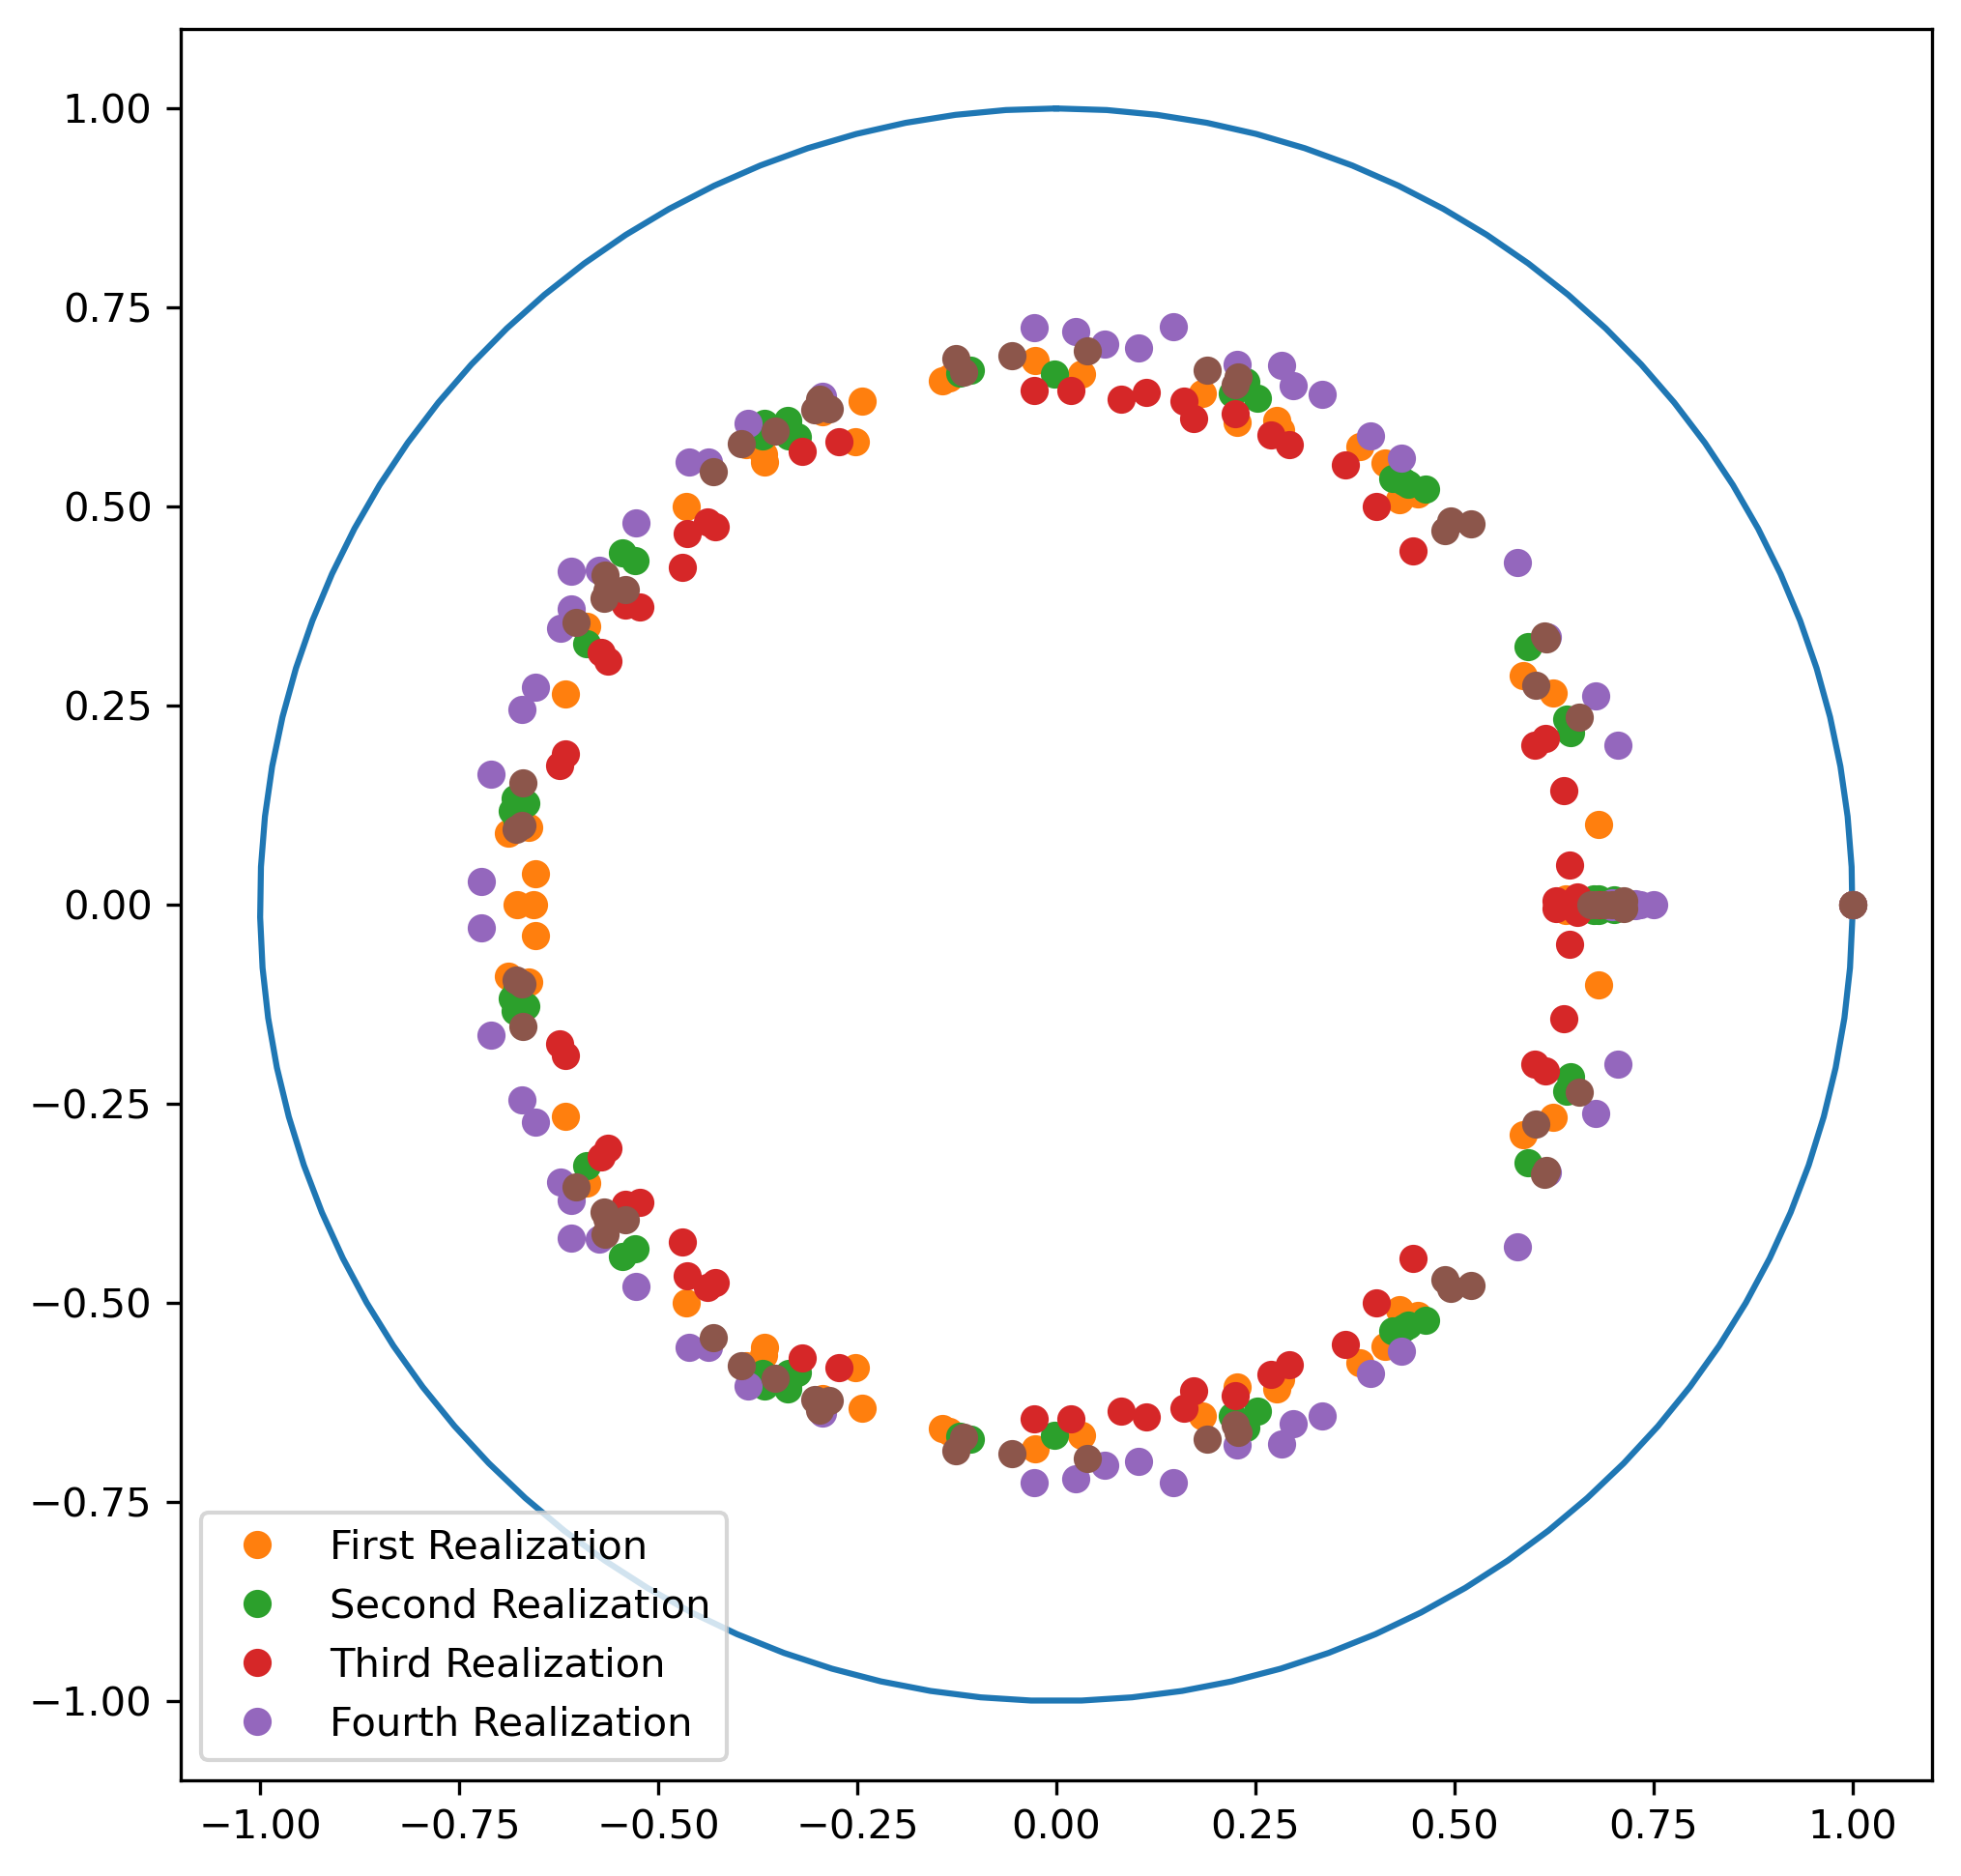

In [16]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
plt.plot(spectrum2[:,0], spectrum2[:,1], "o")
plt.plot(spectrum3[:,0], spectrum3[:,1], "o")
plt.plot(spectrum4[:,0], spectrum4[:,1], "o")
plt.plot(spectrum5[:,0], spectrum5[:,1], "o")
plt.legend(["_", "First Realization", "Second Realization", "Third Realization", "Fourth Realization"])
plt.show()

In [17]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = random_unitary(8, seed=42)
c = 0.65
rank = 8

kraus_target = KrausMap(U = U,
                        c = c,
                        d = d, 
                        rank = rank-1)

choi_target = maps_to_choi([kraus_target])
spectrum_target = choi_spectrum(choi_target)

In [ ]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle)
plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")
plt.legend(["_", "L=9 Random VQC", "U=Haar, C=0.65, Rank=8"])
plt.show()

In [26]:
np.savetxt("ibm_vqc_spectrum.dat", np.abs(spectrum1.numpy()))
np.savetxt("model_spectrum.dat", np.abs(spectrum_target.numpy()))

## Delay

In [7]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_noDelay.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum1, circle, model1 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0015031664708743898


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01168405497806389


In [8]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_2point5usDelay.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum2, circle, model2 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0017676906667736688


  0%|          | 0/2000 [00:00<?, ?it/s]

0.014837883566647874


In [9]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_5usDelay.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum3, circle, model3 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0017278659866455325


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01341009361376973


In [10]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_10usDelay.p", "rb"))

targets_map = counts_to_probs(counts_list[:1500-6**n])
targets_spam = counts_to_probs(counts_list[1500-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum4, circle, model4 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0015675819802714176


  0%|          | 0/2000 [00:00<?, ?it/s]

0.03442422103535124


C:\Users\krist\AppData\Local\Temp\ipykernel_11064\1169044821.py:9: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C2E8B65FC0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 10us"])


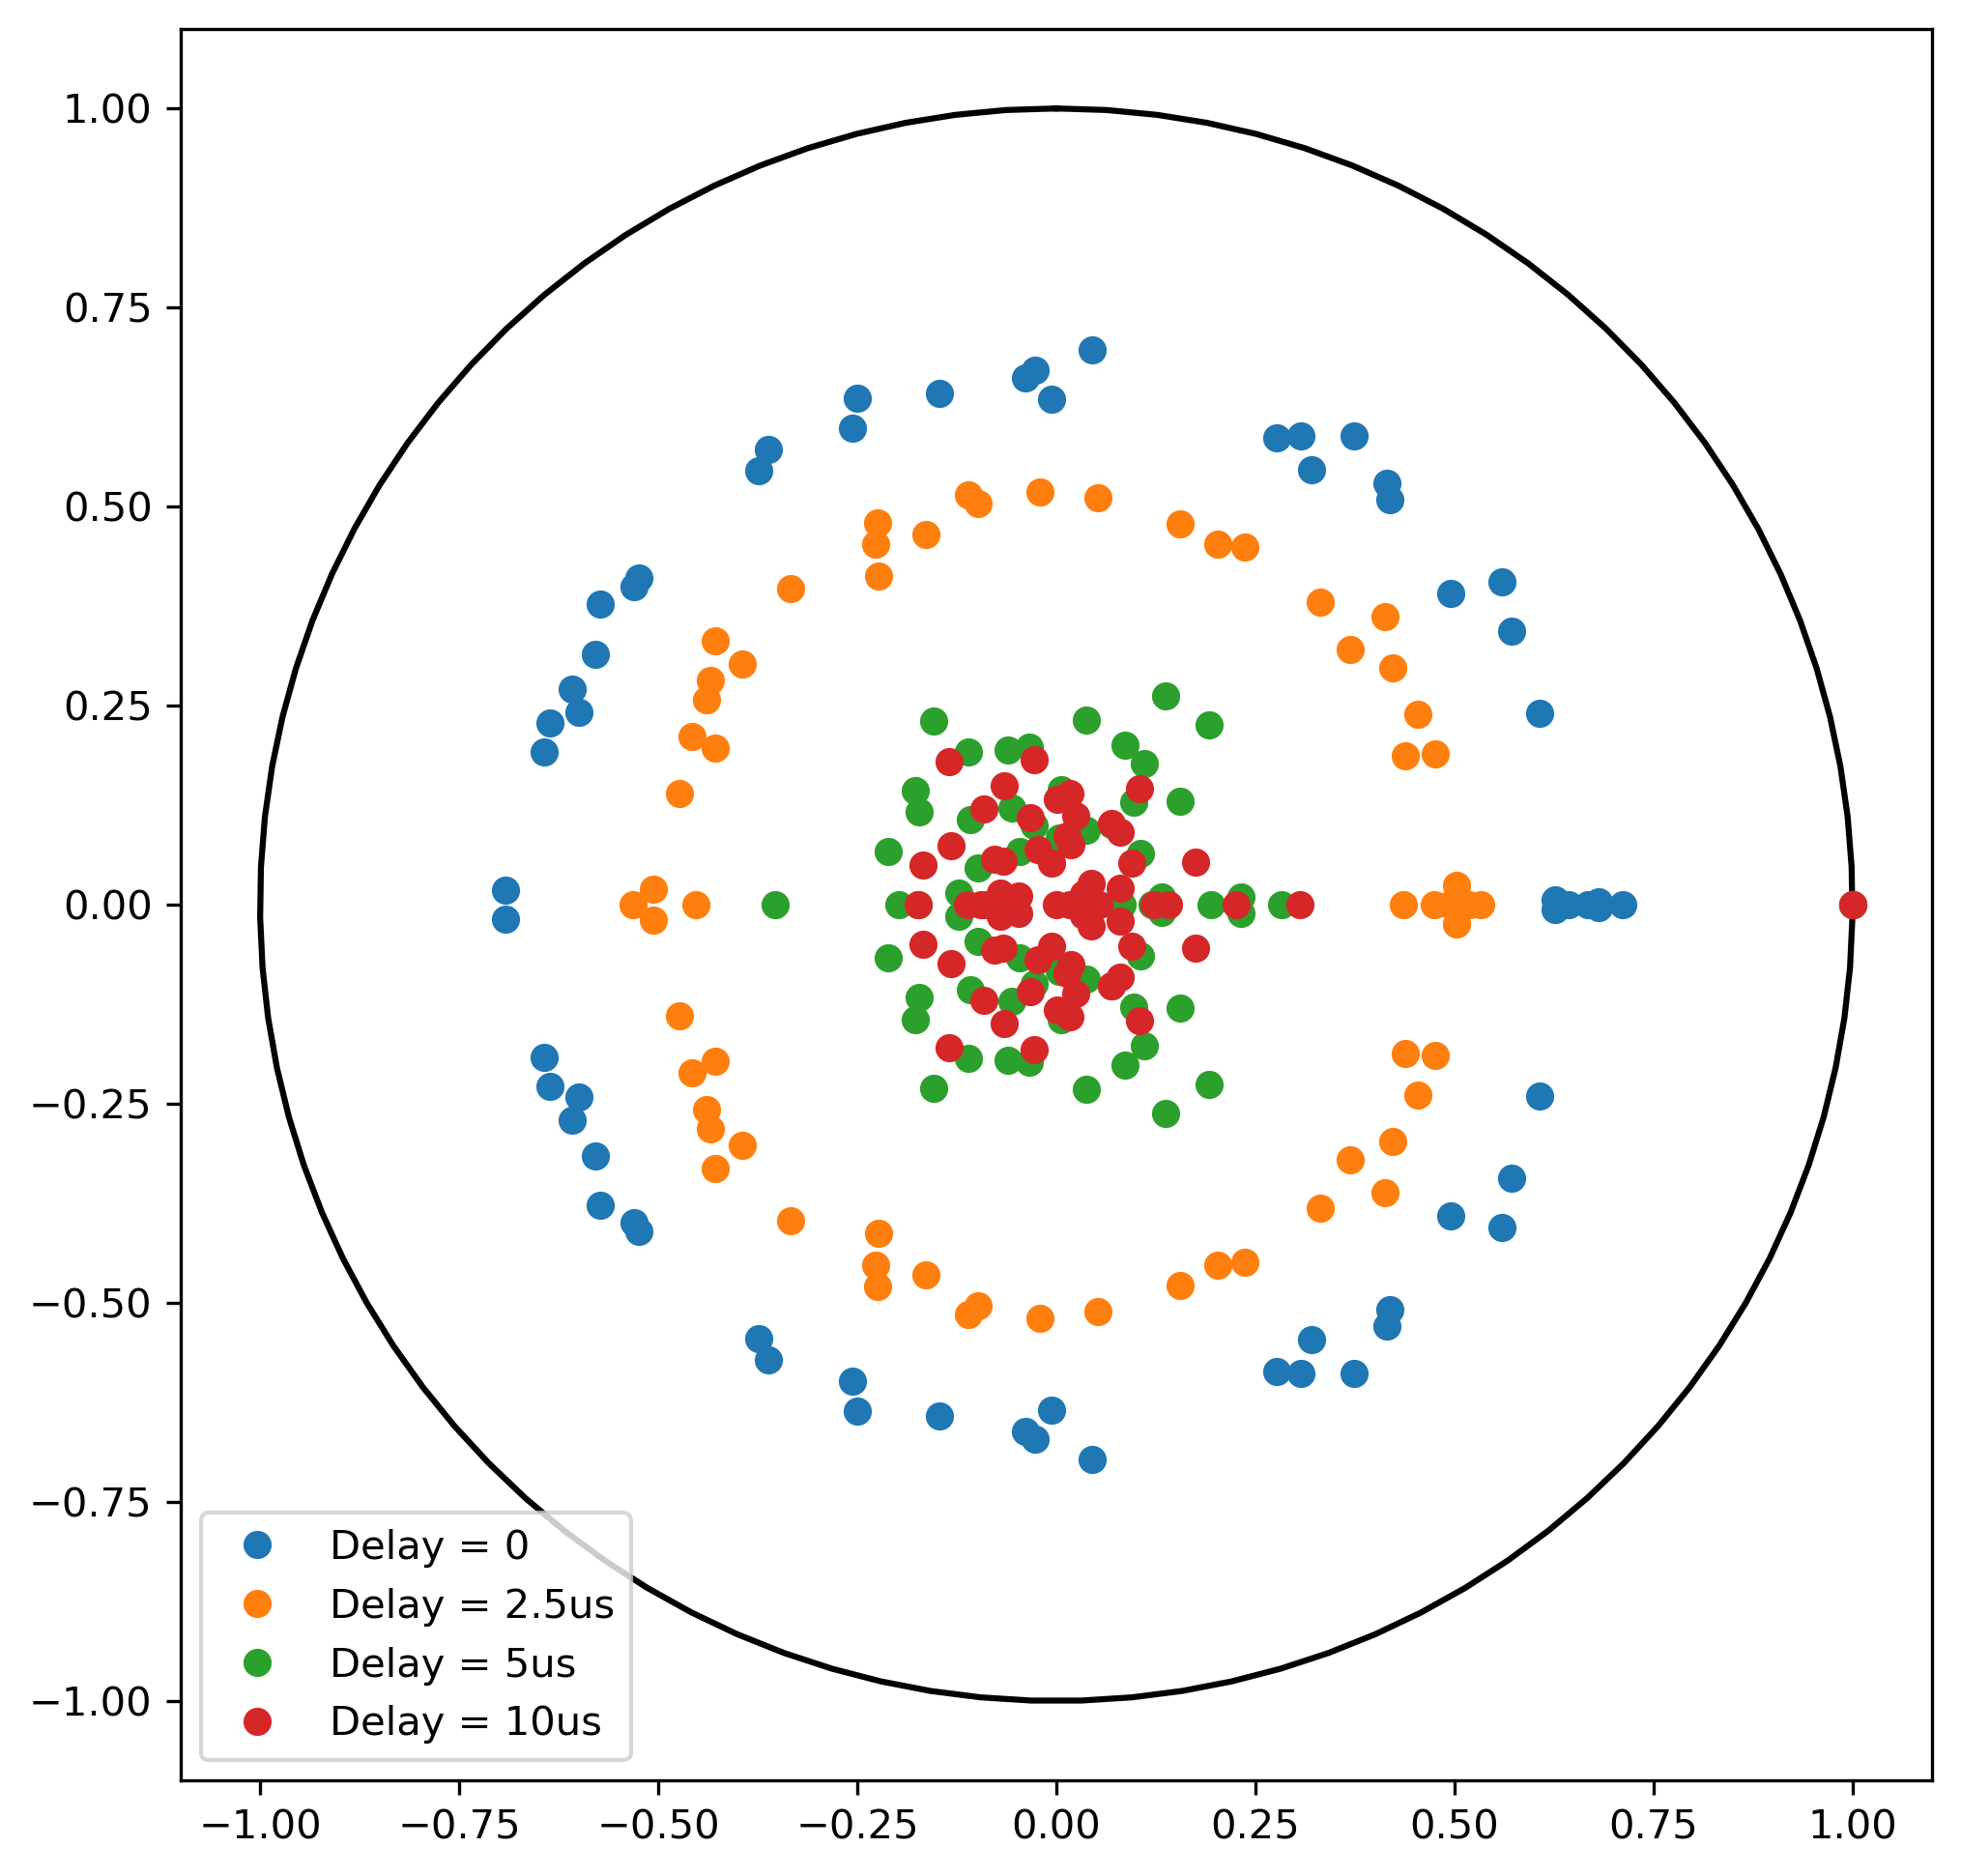

In [13]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
plt.plot(spectrum2[:,0], spectrum2[:,1], "o")
plt.plot(spectrum3[:,0], spectrum3[:,1], "o")
plt.plot(spectrum4[:,0], spectrum4[:,1], "o")
plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 10us"])
plt.show()

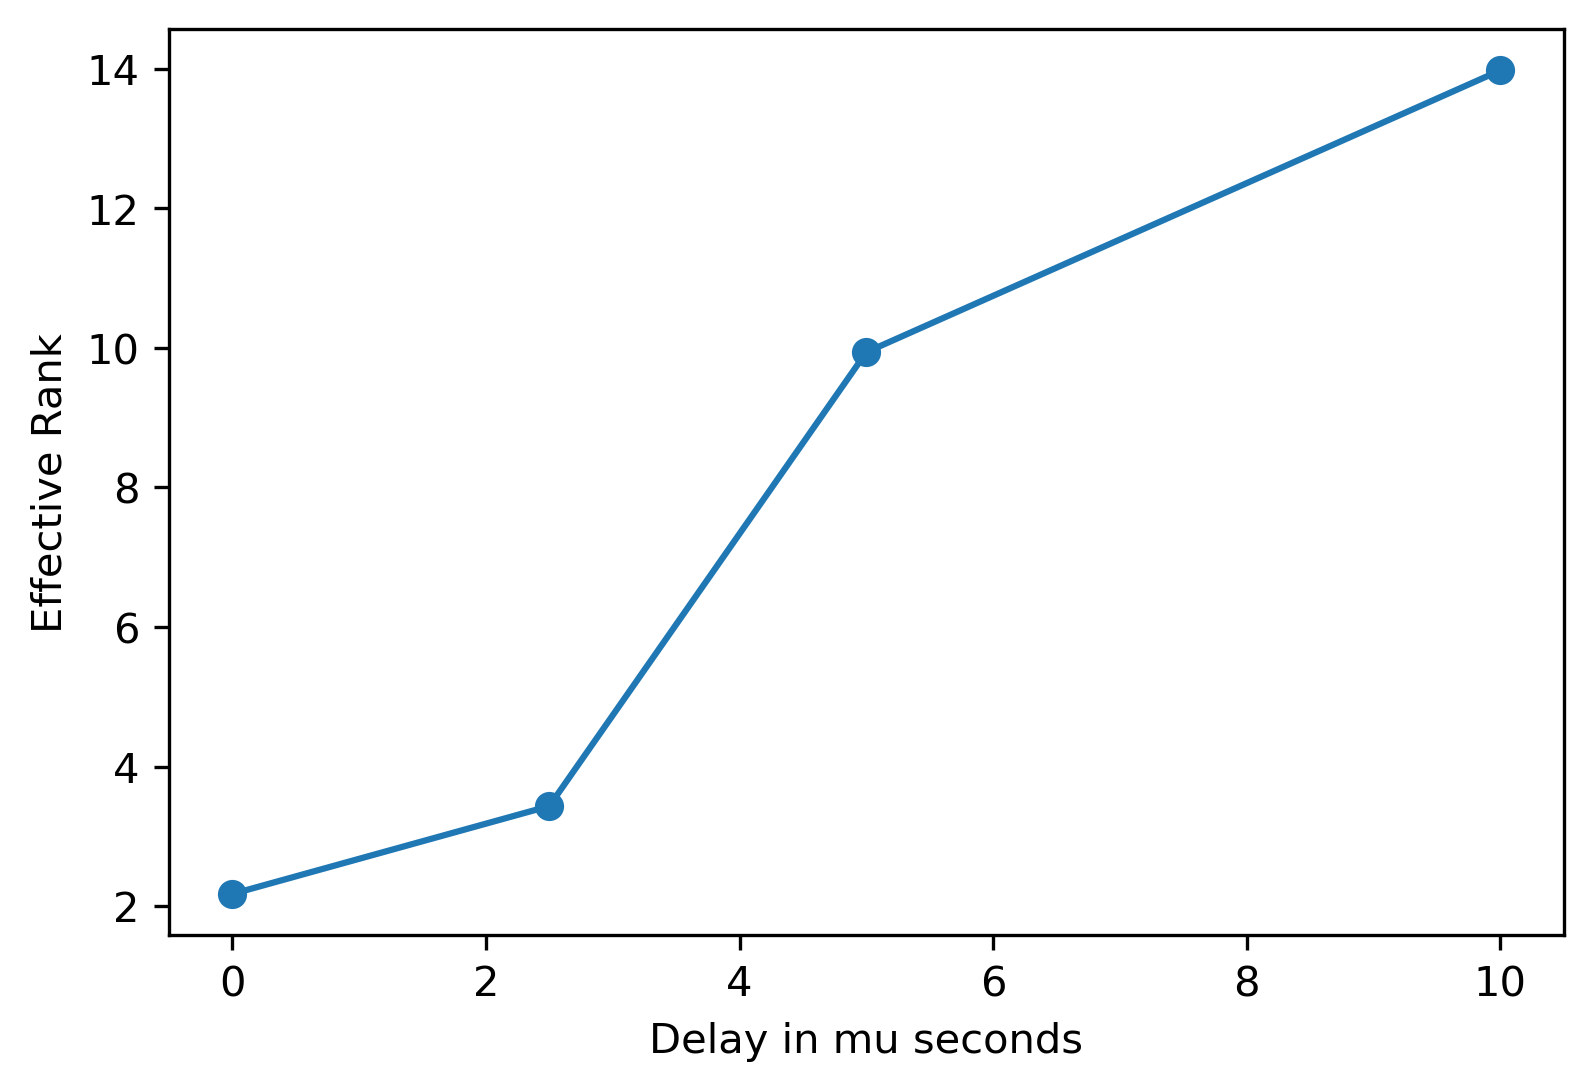

In [15]:
rank_eff_list = [effective_rank(model1.channel), effective_rank(model2.channel), effective_rank(model3.channel), effective_rank(model4.channel)]

fig=plt.figure(dpi = 300, facecolor='w', edgecolor='k')
plt.plot([0, 2.5, 5, 10], rank_eff_list, "o-")
plt.xlabel("Delay in mu seconds")
plt.ylabel("Effective Rank")
plt.show()